In [127]:
import pandas as pd
import pickle
import os
import numpy as np
from datetime import timedelta,datetime

from config import BASE_DIR
print(os.getcwd()+' -> ',end=' ')
os.chdir(BASE_DIR)
print(BASE_DIR)

C:\Users\lbisa\Mi unidad (leonardo.bisaro@gmail.com)\Cripto\python\app\www ->  C:\Users\lbisa\Mi unidad (leonardo.bisaro@gmail.com)\Cripto\python\app\www


In [134]:
klines_file = './backtest/LUNAUSDT - Historico con caida/Completo_LUNAUSDT_0m01_2021-01-01_2023-07-31.DataFrame'

with open(klines_file, 'rb') as file:
    df_1m = pickle.load(file)
columns=['id','interval_id','name','binance','pandas_resample','minutes']
intervals = pd.DataFrame([ 
                            ['0m01','0m01','1 minuto','1m','1T',1],
                            ['0m05','0m05','5 minutos','5m','5T',5],
                            ['0m15','0m15','15 minutos','15m','15T',15],
                            ['0m30','0m30','30 minutos','30m','30T',30],
                            ['1h01','1h01','1 hora','1h','1H',60],
                            ['1h04','1h04','4 horas','4h','4H',(60*4)],
                            ['2d01','2d01','1 dia','1d','1D',(60*24)],
                            ],columns=columns)
intervals.set_index('id',inplace=True)

delta = timedelta(minutes=1)
start_time = df_1m.iloc[0]['datetime']
df_1m['old_datetime'] = df_1m['datetime']
df_1m['datetime'] = df_1m.index*delta+start_time

#corte = datetime.strptime('2022-05-13',"%Y-%m-%d")
#df_1m = df_1m[df_1m['datetime']<corte]



,datetime,open,high,low,close,volume,old_datetime
0,2020-12-31 00:00:00,0.6743,0.6743,0.6740,0.6743,2110.35,2020-12-31 00:00:00
1,2020-12-31 00:01:00,0.6740,0.6740,0.6734,0.6734,8954.76,2020-12-31 00:01:00
2,2020-12-31 00:02:00,0.6742,0.6742,0.6742,0.6742,50.82,2020-12-31 00:02:00
3,2020-12-31 00:03:00,0.6743,0.6745,0.6738,0.6738,1317.65,2020-12-31 00:03:00
4,2020-12-31 00:04:00,0.6744,0.6744,0.6744,0.6744,46.97,2020-12-31 00:04:00
...,...,...,...,...,...,...,...
1330603,2023-07-13 00:43:00,0.5628,0.5630,0.5627,0.5630,4858.08,2023-07-31 23:55:00
1330604,2023-07-13 00:44:00,0.5631,0.5634,0.5630,0.5634,3425.61,2023-07-31 23:56:00
1330605,2023-07-13 00:45:00,0.5631,0.5634,0.5629,0.5631,3727.12,2023-07-31 23:57:00
1330606,2023-07-13 00:46:00,0.5634,0.5638,0.5634,0.5638,1408.96,2023-07-31 23:58:00


./backtest/klines/2d01/Full_LUNAUSDT_2d01_2021-01-01_2022-05-13.DataFrame  -> Create file OK
      datetime    open    high     low   close       volume
0   2020-12-31  0.6743  0.6748  0.6268  0.6520   5093632.19
1   2021-01-01  0.6521  0.6737  0.6298  0.6318   4321993.83
2   2021-01-02  0.6319  0.6498  0.6150  0.6498   4318436.91
3   2021-01-03  0.6498  0.6996  0.6245  0.6984  12332321.81
4   2021-01-04  0.6986  0.7221  0.6294  0.6487  14887480.28
..         ...     ...     ...     ...     ...          ...
920 2023-07-09  0.6072  0.6122  0.5973  0.6087   5302030.77
921 2023-07-10  0.6086  0.6123  0.6041  0.6117   3906848.50
922 2023-07-11  0.6114  0.6164  0.5712  0.5921   7574082.27
923 2023-07-12  0.5921  0.5945  0.5484  0.5634   7708326.67
924 2023-07-13  0.5633  0.5650  0.5546  0.5642    526371.68

[925 rows x 6 columns]


<Axes: >

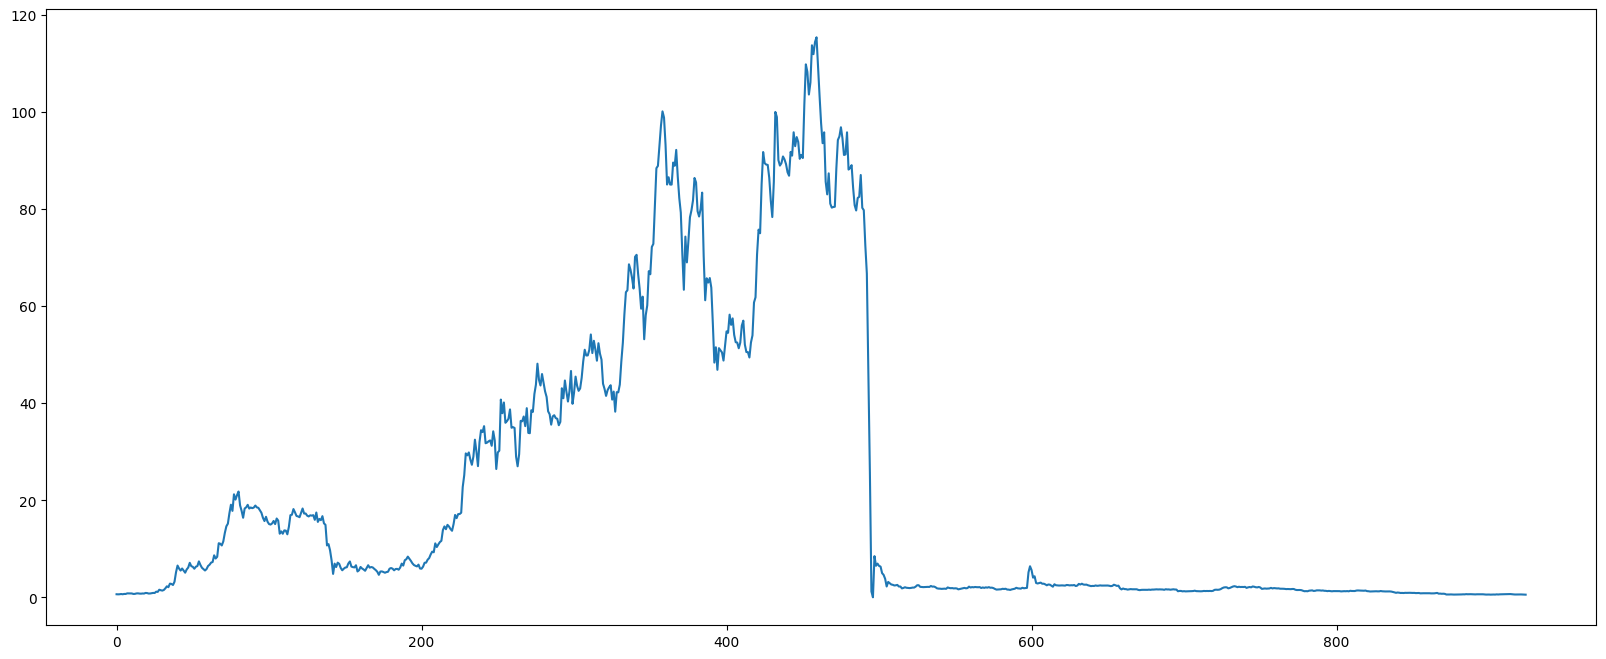

In [142]:
interval_id = '2d01'
resample = timedelta(days = 1)

row = intervals.loc[interval_id]
interval = row['binance']
folder = f'./backtest/klines/{interval_id}/'
if not os.path.exists(folder):
    os.makedirs(folder)



tipo = 'Full'
start = '2021-01-01'
end = '2022-05-13'
symbol = 'LUNAUSDT'
    

file_dump = f'{folder}{tipo}_{symbol}_{interval_id}_{start}_{end}.DataFrame'
print(file_dump,end=" ")

df = df_1m.resample(resample, on="datetime").agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum'
})
df.reset_index(inplace=True)

with open(file_dump, 'wb') as f:
    pickle.dump(df, f)
    print(' -> Create file OK')

klines_file = file_dump

with open(klines_file, 'rb') as file:
    df_new = pickle.load(file)
    print(df_new)

df_new['close'].plot(figsize=(20,8))
